<a href="https://colab.research.google.com/github/baselhusam/Titanic-Dataset---Data-Preparation/blob/main/Data%20Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [2]:
# Show first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# print the shape
df.shape

(891, 12)

In [4]:
# get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Describe the categorical columns
cols = df.select_dtypes(include='object').columns.to_list()

df[cols].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## EDA (Exploratory Data Analysis)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Take a look at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Group the data by sex and calculate the survival rate for each group
df.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [10]:
# Group the data by sex and calculate the survival rate for each group
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
# Group the data by sex and calculate the survival rate for each group
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
# Group the data by Pclass and calculate the survival rate for each group
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Visualizations

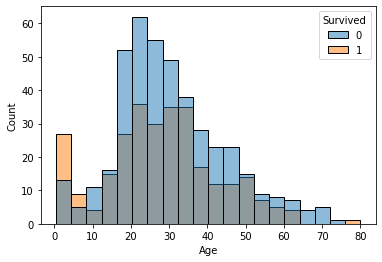

In [ ]:
# Create histograms of Age for survivors and non-survivors
sns.histplot(data=df, x='Age', hue='Survived')
plt.show()

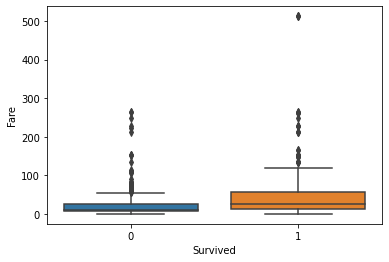

In [ ]:
# Create a box plot of Fare for survivors and non-survivors
sns.boxplot(data=df, x='Survived', y='Fare')
plt.show()

In [ ]:
# Create a FamilySize variable
# df['FamilySize'] = df['SibSp'] + df['Parch']

### Correlation

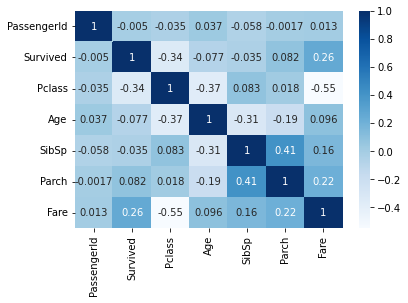

In [ ]:
# Use a heatmap to check for correlations with the new variable
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

### Distribution / Skewness

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


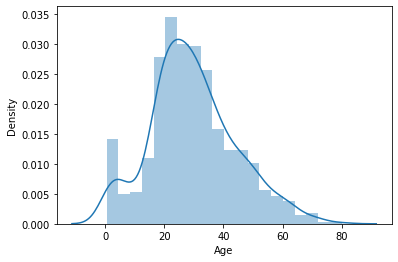

In [ ]:
# Distribution for the Age feature
sns.distplot(df['Age'], hist=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


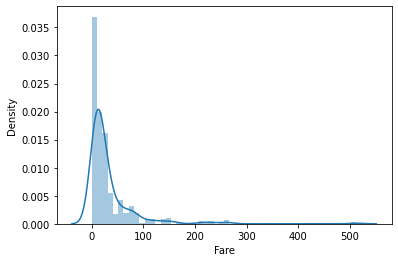

In [ ]:
# Skewness for the Fare feature
sns.distplot(df['Fare'], hist=True);

## Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


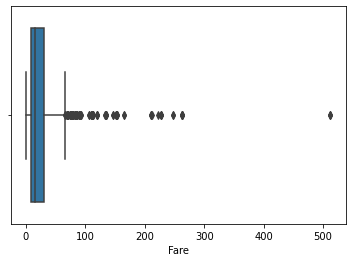

In [ ]:
# Box plot for the Fare Column
sns.boxplot(df['Fare']);

In [ ]:
# Detect Outliers
q1, q3 = df['Fare'].quantile([0.25,0.75])
iqr = q3 - q1
low_bound = q1 - 1.5 * iqr
up_bound = q3 + 1.5 * iqr

# Select the data that is not and outlier
len(df[df['Fare'].between(low_bound,up_bound)])

775

In [ ]:
df.shape

(891, 12)

In [ ]:
# The number of outliers in the Fare column
df.shape[0] - len(df[df['Fare'].between(low_bound,up_bound)]) 

116

## Cleaning & Preprocessing

### Missing Values

In [ ]:
# printing the missing values for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
((df.isnull().sum() / df.shape[0]) * 100 ).round(2) 

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

#### `Cabin` Feature 

In [ ]:
# Drop the Cabin column
print(df.shape)
df.drop(columns='Cabin')
print(df.shape)

(891, 12)
(891, 12)


In [ ]:
# Drop the Cabin column
print(df.shape)
df.drop(columns='Cabin', inplace=True)
print(df.shape)

(891, 12)
(891, 11)


#### `Embaraked` Feature

In [ ]:
# Drop the Null Rows
print("# Null values before:", df['Embarked'].isnull().sum())
print("# Null values after: ", df['Embarked'].dropna().isnull().sum())

# Null values before: 2
# Null values after:  0


In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Fill the Null values in the Embarked feature with mode
print("# Null values before:", df['Embarked'].isnull().sum())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print("# Null values after:", df['Embarked'].isnull().sum())

# Null values before: 2
# Null values after: 0


#### `Age` Feature

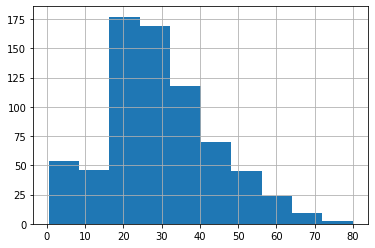

In [ ]:
df['Age'].hist();

In [ ]:
df.Age.mean()

29.69911764705882

In [ ]:
# Fill the Null values in the Age column with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df.select_dtypes(include='object')

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [ ]:
cols = df.select_dtypes(include='object').columns.to_list()

for col in cols:
  print("Column name: ", col)
  print("Number of unique values: ", df[col].nunique())
  print("The unique values: ", df[col].unique())
  print("\n\n")

Column name:  Name
Number of unique values:  891
The unique values:  ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fort

#### Drop the `Ticket`, and `Name` Columns

In [ ]:
df.drop(columns=['Ticket','Name'], inplace=True)
df.shape

(891, 9)

#### One Hot Encoding

##### using `get_dummies`

In [ ]:
pd.get_dummies(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


##### using `.replace` method

In [ ]:
df['Sex'].replace({'male':1,"female":0})

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

##### using `sklearn` lib

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe.fit_transform(df[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

##### We will use `pd.get_dummies`

In [ ]:
df = pd.get_dummies(df)

### Scaling

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
886,887,0,2,27.000000,0,0,13.00,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.00,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.45,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.00,0,1,1,0,0
890,891,0,3,32.000000,0,0,7.75,0,1,0,1,0


In [ ]:
df.drop(columns='PassengerId', inplace=True)
df.shape

(891, 11)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df[['Age','Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


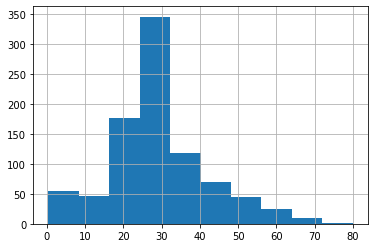

In [ ]:
df.Age.hist();

In [ ]:
df.Age.skew()

0.4344880940129925

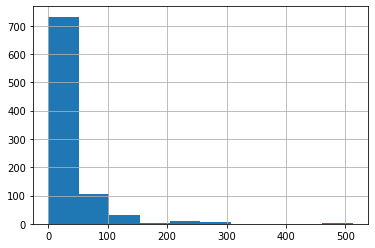

In [ ]:
df.Fare.hist()

#### Scale the `Fare` Feature using `Min Max Scaler`




In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df["Fare"] = mms.fit_transform(df[["Fare"]])

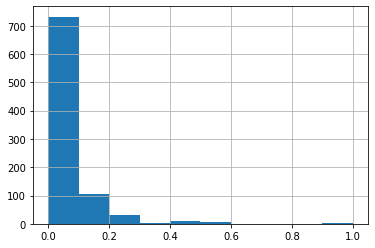

In [ ]:
df["Fare"].hist();

#### Scale the `Age` column using `Standard Scaler`

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df["Age"] = ss.fit_transform(df[["Age"]])

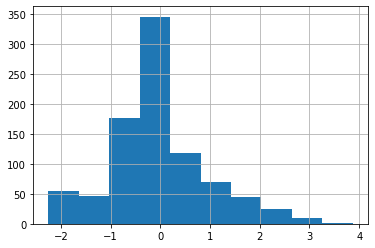

In [ ]:
df["Age"].hist()

## Feature Engineering

### Feature Extraction

In [ ]:
df.shape

(891, 11)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.592481,1,0,0.014151,0,1,0,0,1
1,1,1,0.638789,1,0,0.139136,1,0,1,0,0
2,1,3,-0.284663,0,0,0.015469,1,0,0,0,1
3,1,1,0.407926,1,0,0.103644,1,0,0,0,1
4,0,3,0.407926,0,0,0.015713,0,1,0,0,1


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,3,-0.592481,1,0,0.014151,0,1,0,0,1,1
1,1,1,0.638789,1,0,0.139136,1,0,1,0,0,1
2,1,3,-0.284663,0,0,0.015469,1,0,0,0,1,0
3,1,1,0.407926,1,0,0.103644,1,0,0,0,1,1
4,0,3,0.407926,0,0,0.015713,0,1,0,0,1,0


### Feature Selection

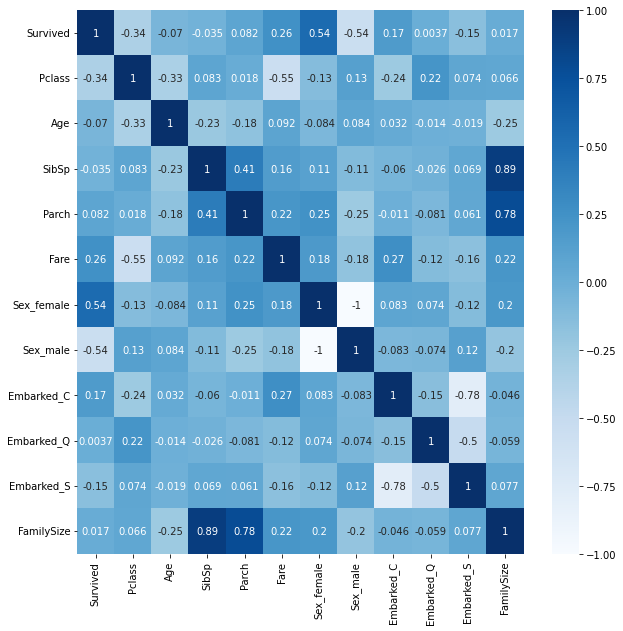

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, ax=ax);

In [ ]:
df = df[['FamilySize','Survived','Pclass','Age','Sex_female','Embarked_C','Embarked_Q','Embarked_S']]

In [ ]:
df.shape

(891, 8)

In [ ]:
df.head()

,FamilySize,Survived,Pclass,Age,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.592481,0,0,0,1
1,1,1,1,0.638789,1,1,0,0
2,0,1,3,-0.284663,1,0,0,1
3,1,1,1,0.407926,1,0,0,1
4,0,0,3,0.407926,0,0,0,1


In [ ]:
df.drop(columns='Embarked_S', inplace=True)

In [ ]:
df.head()

,FamilySize,Survived,Pclass,Age,Sex_female,Embarked_C,Embarked_Q
0,1,0,3,-0.592481,0,0,0
1,1,1,1,0.638789,1,1,0
2,0,1,3,-0.284663,1,0,0
3,1,1,1,0.407926,1,0,0
4,0,0,3,0.407926,0,0,0


## Splitting

In [ ]:
df.head()

,FamilySize,Survived,Pclass,Age,Sex_female,Embarked_C,Embarked_Q
0,1,0,3,-0.592481,0,0,0
1,1,1,1,0.638789,1,1,0
2,0,1,3,-0.284663,1,0,0
3,1,1,1,0.407926,1,0,0
4,0,0,3,0.407926,0,0,0


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

### Train / Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 6), (712,), (179, 6), (179,))

### Train / Val / Test

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [ ]:
X_train.shape, y_train.shape

((623, 6), (623,))

In [ ]:
X_val.shape, y_val.shape

((134, 6), (134,))

In [ ]:
X_test.shape, y_test.shape

((134, 6), (134,))

## THE END ( THANK YOU )